# Курс по машинному обучению,   ВМК МГУ
# KNN: Классификация и регрессия

### Важно! О формате сдачи

* **Задания из ноутбука, за исключением двух заданий на реализацию кода, оцениваются по системе <font color='red'>кросс-рецензирования</font>.**
* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**

### Важно!

**Перед тем, как сдать ноутбук на кросс-рецензирование, мы рекомендуем перезапустить ядро и выполнить весь ноутбук (cell -> run all)**

# Часть 0. Знакомство с библиотекой scikit-learn

Scikit-learn - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

Каждый модуль предобработки данных имеет два метода: fit и transform. Как правило, метод fit принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики. Метод transform преобразует входные **(train и test)** данные, используя статистики, посчитанные при вызове метода fit и возвращает преобразованные данные.

Каждая модель машинного обучения имеет два метода: fit - метод ответственный за обучения модели и predict - метод ответственный за предсказание целевой переменной. Многие модели имеют метод predcit_proba, который возвращает вероятность принадлежности объекта к каждому из классов. Как правило, метод fit принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки. Метод predict принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных.

Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* Нормализация к распределению с нулевым матожиданием и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации 

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

**Задание 1.1** (тесты, 5 баллов) В модуле scalers.py реализуйте два вида нормализации признакового пространства. StandardScaler - нормализация к распределению с нулевым матожиданием и единичной дисперсией, MinMaxScaler - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод fit и метод transform. Метод fit получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод transform преобразует данные, используя статистистики, посчитанные при вызове метода fit.

Положите файл scalers.py в одну директорию с jupyter ноутбуком

In [1]:
from scalers import StandardScaler, MinMaxScaler

In [2]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [3]:
with open('data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [4]:
X[0]

array([-2.23355354, -7.00939385])

In [5]:
X.shape

(200, 2)

In [6]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

Визуализируем наши данные

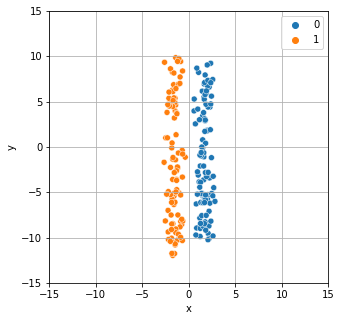

In [7]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [8]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #     # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

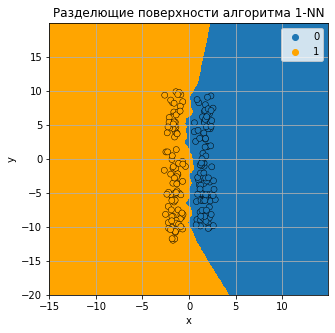

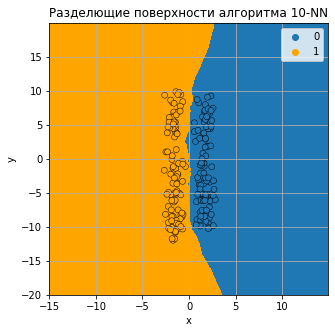

In [9]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

ВАШ ОТВЕТ: кривые стали несколько более гладкими, это достаточно известное явление при увеличении K в методе KNN

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x=0$ при значениях $y < -10$ и $y > 10$

ВАШ ОТВЕТ: это связано с тем , что у объектов с признаками 1 несколько большие значения по модулю по оси Y, в том числе видимо из-за несколько большего разброса объектов данного класса, и это задаёт такую форму кривых для разделяющей поверхности в связи с расстоянием до объекта которое ~~ серединный перпендикуляр между двумя точками (и если для Y больше значения, то эта кривая отклоняется достаточно значительно)


Данную проблему может решить нормализация признакового пространства. 

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$

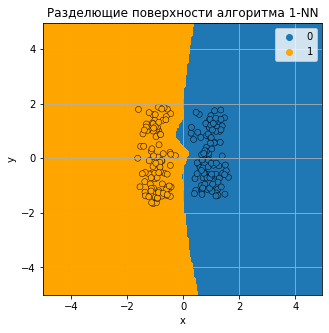

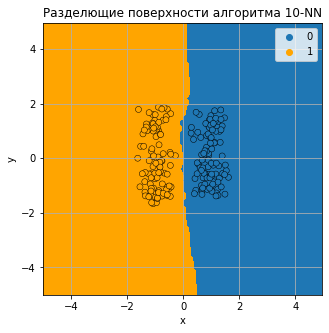

In [10]:
#ваш код, нормализация с StandardScaler

tmp = StandardScaler()
tmp.fit (data=X)
X_normalized = tmp.transform (X)
#tmp.fit (data=y)
#y_normalized = tmp.transform (y)

plot_knn_bound(X_normalized, y,  n_neighbors=1, xlim=(-5, 5), ylim=(-5, 5))
plot_knn_bound(X_normalized, y, n_neighbors=10, xlim=(-5, 5), ylim=(-5, 5))

In [11]:
#ваш код, нормализация с MinMaxScaler

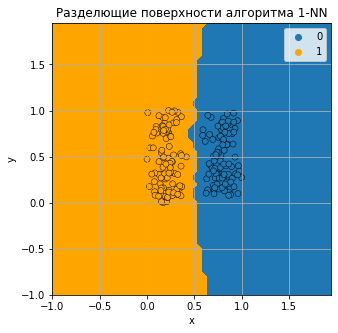

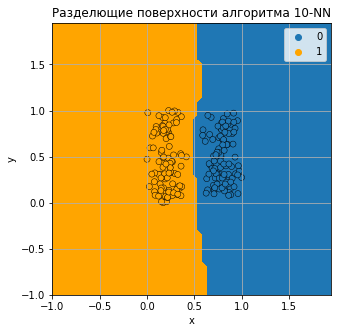

In [12]:
tmp = MinMaxScaler()
tmp.fit (data=X)
X_normalized = tmp.transform (X)
#tmp.fit (data=y)
#y_normalized = tmp.transform (y)

plot_knn_bound(X_normalized, y,  n_neighbors=1, xlim=(-1, 2), ylim=(-1, 2))
plot_knn_bound(X_normalized, y, n_neighbors=10, xlim=(-1, 2), ylim=(-1, 2))

**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1$-$NN$ классификатор. Чем с геометрической точки зрения являются раделяющие поверхности этого классификатора? Приведите доказательство для произвольного числа точек

В качестве примера ниже представлена визуализация для четырех точек

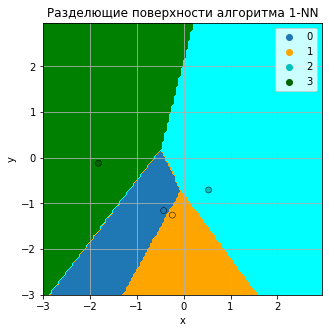

In [13]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

ВАШ ОТВЕТ: Являются многоугольниками

Что следует из того, что любые разделяющие поверхности между любыми двумя классами являются прямыми - серединными перпендикулярами. Любые фигуры образованные из прямых будут также являться многоугольниками.

Обходя для I-того класса разделяющие прямые, начиная с ближайшей до точек пересечения с другими разделяющими прямыми этого класса, мы получим область, относящуюся к данному классу (многоугольник или область на плоскости похожую на многоугольник)

# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому кросс-валидация. Пусть зафиксирован некоторый набор параметров модели. В $KNN$ под параметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$. При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds). Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной. Финальным значением метрики качества для модели с заданными параметрами является среднее полученных нами значений на $n$ фолдах.

Принцип работы кросс-валидации схематично изображен на рисунке.

<img src="cross-val.png" style="width: 700px;">


**Задание 2.1** (тест, 10 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели

Далее будем решать задачу предсказания цены дома в Бостоне с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true))^2}$

Наилучшее значение метрики равно $1.0$, метрика может принимать отрицательные значения

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [15]:
X, y = load_boston(return_X_y=True)

**Задание 2.2** (кросс, 1 балл) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Параметры для перебора описаны ниже

In [16]:
# ваш код
X_train, X_test, y_train, y_test = train_test_split(    X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score

Положите файл cross_val.py в одну директорию с jupyter ноутбуком

In [18]:
from cross_val import kfold_split, knn_cv_score

#neighbors.KNeighborsClassifier
res = knn_cv_score(X_train, y_train, parameters, score_function,  \
             kfold_split(len(X_train), 3), neighbors.KNeighborsRegressor)

{}
{('None', 1, 'euclidean', 'uniform'): 0.32798718613907635}
{('None', 1, 'euclidean', 'uniform'): 0.32798718613907635, ('None', 1, 'euclidean', 'distance'): 0.32798718613907635}
{('None', 1, 'euclidean', 'uniform'): 0.32798718613907635, ('None', 1, 'euclidean', 'distance'): 0.32798718613907635, ('None', 1, 'cosine', 'uniform'): 0.2706841763263995}
{('None', 1, 'euclidean', 'uniform'): 0.32798718613907635, ('None', 1, 'euclidean', 'distance'): 0.32798718613907635, ('None', 1, 'cosine', 'uniform'): 0.2706841763263995, ('None', 1, 'cosine', 'distance'): 0.2706841763263995}
{('None', 1, 'euclidean', 'uniform'): 0.32798718613907635, ('None', 1, 'euclidean', 'distance'): 0.32798718613907635, ('None', 1, 'cosine', 'uniform'): 0.2706841763263995, ('None', 1, 'cosine', 'distance'): 0.2706841763263995, ('None', 5, 'euclidean', 'uniform'): 0.4073418807077696}
{('None', 1, 'euclidean', 'uniform'): 0.32798718613907635, ('None', 1, 'euclidean', 'distance'): 0.32798718613907635, ('None', 1, 'cosine

**Задание 2.3** (кросс, 3 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.

Выведите результаты кросс-валидации

In [19]:
#ваш код
res_list = res.items()
res_list = sorted (res_list,key=lambda x: x[1], reverse=True)

In [20]:
res_list

[(('None', 10, 'cosine', 'distance'), 0.5061782278218225),
 (('MinMax', 10, 'cosine', 'distance'), 0.5061782278218225),
 (('Standard', 10, 'cosine', 'distance'), 0.5061782278218225),
 (('None', 5, 'cosine', 'distance'), 0.4997134296256324),
 (('MinMax', 5, 'cosine', 'distance'), 0.4997134296256324),
 (('Standard', 5, 'cosine', 'distance'), 0.4997134296256324),
 (('None', 5, 'euclidean', 'distance'), 0.4618360836998872),
 (('MinMax', 5, 'euclidean', 'distance'), 0.4618360836998872),
 (('Standard', 5, 'euclidean', 'distance'), 0.4618360836998872),
 (('None', 5, 'cosine', 'uniform'), 0.4562802468921873),
 (('MinMax', 5, 'cosine', 'uniform'), 0.4562802468921873),
 (('Standard', 5, 'cosine', 'uniform'), 0.4562802468921873),
 (('None', 10, 'euclidean', 'distance'), 0.45453774268456987),
 (('MinMax', 10, 'euclidean', 'distance'), 0.45453774268456987),
 (('Standard', 10, 'euclidean', 'distance'), 0.45453774268456987),
 (('None', 5, 'euclidean', 'uniform'), 0.4073418807077696),
 (('MinMax', 5, 

In [21]:
res_list[:1]

[(('None', 10, 'cosine', 'distance'), 0.5061782278218225)]

ВАШ ОТВЕТ [(('None', 10, 'cosine', 'distance'), 0.5061782278218225)]

Удалось достичь 0.5061782278218225

Что касается закономерностей, видно, что результаты улучшаются при увеличеннии числа K. И что нормализация практически не оказывает влияния. И что косинусная близость в целом несколько лучше чем евклидовская метрика в рамках этой задачи

Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [22]:
#  Обучите модель с наилучшими параметрами на всей обучающей выборке, 
#  измерьте  r2_score  на тестовой выборке.
X_train_normalized = X_train
X_test_normalized = X_test


tmp_knn_class =  neighbors.KNeighborsRegressor(n_neighbors=10, metric='cosine', weights='distance')
tmp_knn_class.fit(X_train_normalized, y_train)


y_predict = tmp_knn_class.predict(X_test_normalized)
total_score = score_function ( y_test, y_predict ) 


In [23]:
total_score

0.6285600614974665

Здесь R2Score = 0.6285600614974665

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [24]:
from sklearn import neighbors, datasets
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [25]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в метрическое пространство фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [27]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$.

In [28]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

In [29]:
y_train.shape

(11314,)

In [30]:
import numpy as np
from collections import defaultdict

def kfold_split(num_objects, num_folds):
    answer_list = []
    i = 0
    for i in range (0, num_folds - 1):
        fold        = np.arange (i * (num_objects // num_folds), (i + 1) * (num_objects // num_folds)) 
        out_of_fold = np.concatenate (   (np.arange (0, i * (num_objects // num_folds)), np.arange ((i+1) * (num_objects // num_folds), num_objects )) , axis=0   )
        answer_list.append (  (out_of_fold, fold)    )
    
    fold        = np.arange (  (num_folds - 1)* (num_objects // num_folds), num_objects  ) 
    out_of_fold = np.arange (0, (num_folds - 1) * (num_objects // num_folds))
    
    answer_list.append (     (out_of_fold, fold)     )
    
    return answer_list
    
def knn_cv_score(X, y, parameters, score_function, folds, knn_class):
    answer_dict = dict()
    
    n_list           =  parameters["n_neighbors"]
    metrics_list     =  parameters["metrics"]
    weights_list     =  parameters["weights"]
    normalizers_list =  parameters["normalizers"]
    
    list_folds = folds
    #tmp_knn_class = knn_class
    X_normalized = []
    
    for normalizer in normalizers_list:
        if (normalizer[0] != None):            
            normalizer[0].fit (X)
            X_normalized = normalizer[0].transform(X)
        else:
            X_normalized = X

        print (X_normalized.shape)

        for n in n_list:
            for metrics in metrics_list:
                for weights in weights_list:
                    total_score = 0;
                    
                    tmp_knn_class = knn_class(n_neighbors=n, metric=metrics, weights=weights)
                    for fold in list_folds:
                        tmp_knn_class.fit(X_normalized[fold[0]], y[fold[0]])
                        y_predict = tmp_knn_class.predict(X_normalized[fold[1]])
                        #total_score += score_function ( y_predict , y[fold[1]]) 
                        total_score += score_function ( y[fold[1]], y_predict ) 
                    
                    total_score = total_score /  len (list_folds)
                    
                    print (answer_dict)
                    answer_dict [(normalizer[1], n, metrics, weights)] = total_score    
    
    
    return answer_dict
    

In [31]:
#ваш код
#X_train = X_train.reshape (-1, 1)


In [32]:
X_train.shape

(11314,)

In [33]:
list_of_tuples = knn_cv_score(X_train, y_train, parameters, accuracy_score,\
             kfold_split(len(X_train), 3), neighbors.KNeighborsClassifier)



(11314, 15288)
{}
{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5845843223746479}
{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5845843223746479, ('CountVectorizer', 1, 'euclidean', 'distance'): 0.5845843223746479}
{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5845843223746479, ('CountVectorizer', 1, 'euclidean', 'distance'): 0.5845843223746479, ('CountVectorizer', 1, 'cosine', 'uniform'): 0.7717866784700154}
{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5845843223746479, ('CountVectorizer', 1, 'euclidean', 'distance'): 0.5845843223746479, ('CountVectorizer', 1, 'cosine', 'uniform'): 0.7717866784700154, ('CountVectorizer', 1, 'cosine', 'distance'): 0.7717866784700154}
{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5845843223746479, ('CountVectorizer', 1, 'euclidean', 'distance'): 0.5845843223746479, ('CountVectorizer', 1, 'cosine', 'uniform'): 0.7717866784700154, ('CountVectorizer', 1, 'cosine', 'distance'): 0.7717866784700154, ('CountVectorizer', 2, 'euclidean'

In [34]:
best = sorted (list_of_tuples.items(), key=lambda x: x[1], reverse=True)

In [38]:
best[:20]

[(('TfidfVectorizer', 1, 'euclidean', 'uniform'), 0.7888454090344923),
 (('TfidfVectorizer', 1, 'euclidean', 'distance'), 0.7888454090344923),
 (('TfidfVectorizer', 1, 'cosine', 'uniform'), 0.7888454090344923),
 (('TfidfVectorizer', 1, 'cosine', 'distance'), 0.7888454090344923),
 (('TfidfVectorizer', 2, 'euclidean', 'distance'), 0.7888454090344923),
 (('TfidfVectorizer', 2, 'cosine', 'distance'), 0.7888454090344923),
 (('TfidfVectorizer', 10, 'cosine', 'distance'), 0.7877843777918946),
 (('TfidfVectorizer', 9, 'cosine', 'distance'), 0.7872541316641418),
 (('TfidfVectorizer', 3, 'cosine', 'distance'), 0.7870775782400693),
 (('TfidfVectorizer', 4, 'cosine', 'distance'), 0.7858399935733992),
 (('TfidfVectorizer', 6, 'cosine', 'distance'), 0.785574975963519),
 (('TfidfVectorizer', 5, 'cosine', 'distance'), 0.7854867461199256),
 (('TfidfVectorizer', 8, 'cosine', 'distance'), 0.7854865820803759),
 (('TfidfVectorizer', 7, 'cosine', 'distance'), 0.785133076850467),
 (('TfidfVectorizer', 3, 'eu

In [39]:
#Ответ: ('TfidfVectorizer', 1, 'euclidean', 'uniform'), 0.7888454090344923)

**Задание 3.2** (кросс, 2 балла) Какой метод 

---

предобработки данных в среднем дает наилучший результат? Почему?

In [40]:
# ваш код
CV_list = []
CV_mean = 0 

TFIDF_list = []
TFIDF_mean = 0

for elem in list_of_tuples.items():
  if (elem[0][0] == 'CountVectorizer'):
    CV_list.append (elem)
    CV_mean += elem[1]
  else:
    TFIDF_list.append (elem)
    TFIDF_mean += elem[1]

CV_mean /= len (CV_list)
TFIDF_mean /= len (TFIDF_list)

In [41]:
CV_mean


0.6267627473259445

In [42]:
TFIDF_mean

0.7688237275756762

ВАШ ОТВЕТ: В среднем TFIDF даёт лучший результат (см выше)
Как известно, из определения TF-IDF, "
умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах обучающей выборки.". ТО есть, TF-IDF снижает роль общеупотребительных слов, то есть является более точной моделью.

**Задание 3.3** (кросс, 2 балла) Какая метрика близости позволяет в среднем достичь наилучшее качество? Почему?

In [43]:
tmp_list = list_of_tuples.items()
cosine_list = [item[1] for item in tmp_list    if item[0][2] == 'cosine']
euclidian_list = [item[1] for item in tmp_list    if item[0][2] == 'euclidean']

cosine_mean = sum(cosine_list ) / len (cosine_list)
euclidian_mean = sum (euclidian_list) / len (euclidian_list)


In [44]:
cosine_mean

0.758354520798762

In [45]:
euclidian_mean

0.6372319541028587

ВАШ ОТВЕТ: В среднем COSINE то есть косинусная мера лучше. Потому что таковы свойства данных в данном случае. А это в свою очередь вероятно потому что в многомерных пространствах все элементы примерно одинаково далеки друг от друга, а направления несут в себе несколько больше информации

**Задание 3.4** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

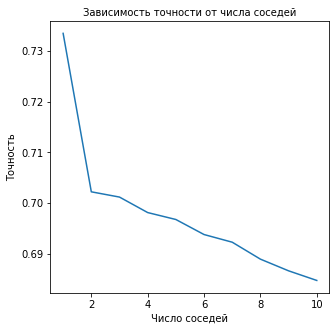

In [46]:
# ваш код
import matplotlib.pyplot as plt


tmp_list = list_of_tuples.items()

x_list = list(range(1, 11))
y_list = []

for x in x_list:
  tmp_y          = [item[1] for item in tmp_list    if item[0][1] == x]
  tmp_y_mean     = sum(tmp_y) / len (tmp_y)
  y_list.append(tmp_y_mean)

plt.title('Зависимость точности от числа соседей', fontsize=10)
plt.plot(x_list, y_list, label='Зависимость точности от числа соседей')
plt.ylabel('Точность',  fontsize=10)
plt.xlabel('Число соседей',  fontsize=10)


plt.show()



ВАШ ОТВЕТ: данные таковы, что точность убывает при увеличении числа соседей

**Задание 3.5** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему?

In [47]:
tf_idf.fit (X_train)
X_train_normalized = tf_idf.transform(X_train)

X_test_normalized = tf_idf.transform(X_test)


tmp_knn_class = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')
tmp_knn_class.fit(X_train_normalized, y_train)


y_predict = tmp_knn_class.predict(X_test_normalized)
total_score = accuracy_score ( y_test, y_predict ) 

print (total_score)

0.6510886882634095


ВАШ ОТВЕТ: модель переобучилась или "запомнила" какие то данные из обучающей выборки, поэтому на тестовой точность снизилась

**(!)** А теперь перезапустите ноутбук: Kernel -> Restart & Run All